In [1]:
import libs.ssnmf_train as train
import libs.ssnmf_test as test

# Parameters:
* The number of sub topics: **n_topics**
* A loss function for NMF model: **betaloss** ‘frobenius’, ‘kullback-leibler’, ‘itakura-saito’
* Used brown corpus as a background corpus: **bckg_brown**
* The number of words to show us: **word_count**
* **context** is a dictionary which has four components that are nmf_list, W_list, tfidf, and tfidf_vectorizer, respectively.
* To export result to a file: **output_file**

# Train

In [2]:
input_file = 'pruned_schwartz.json'
beta_loss = 'kullback-leibler'
bckgrnd_brown = False
n_of_topics = 3
n_of_top_words = 7
n_of_words = 10

In [3]:
train_context = train.train_model(filepath=input_file, n_topics=n_of_topics, betaloss=beta_loss, bckg_brown=bckgrnd_brown)

Extracting tf-idf features for NMF...
Fitting NMF for 'universalism', 'hedonism', 'achievement', 'power', 'self-direction', 'benevolence', 'conformity', 'tradition', 'stimulation', 'security'


In [4]:
train.report_training_topics(train_context, n_top_words=n_of_top_words, n_topics=n_of_topics)


Topics in NMF model:
universalism
Topic #0: movement - state - environmental - social - marriage - party - samesex
Topic #1: environmental - right - law - peace - social - war - state
Topic #2: energy - ecology - use - human - peace - think - system

hedonism
Topic #0: pain - love - orgasm - one - empathy - people - may
Topic #1: one - happiness - pleasure - social - desire - anxiety - life
Topic #2: may - one - experience - emotion - also - shame - pleasure

achievement
Topic #0: social - class - capital - society - labour - work - inequality
Topic #1: work - hour - social - individual - goal - high - management
Topic #2: capital - status - social - human - need - individual - people

power
Topic #0: power - use - experiment - milgram - make - control - process
Topic #1: time - state - wealth - power - collapse - class - may
Topic #2: authority - power - veto - bill - social - state - individual

self-direction
Topic #0: creativity - play - creative - intelligence - process - theory 

In [5]:
train.report_df(train_context, word_count=n_of_words)

,universalism (0) - word,universalism (0) - score,universalism (1) - word,universalism (1) - score,universalism (2) - word,universalism (2) - score,benevolence (0) - word,benevolence (0) - score,benevolence (1) - word,benevolence (1) - score,...,stimulation (1) - word,stimulation (1) - score,stimulation (2) - word,stimulation (2) - score,self-direction (0) - word,self-direction (0) - score,self-direction (1) - word,self-direction (1) - score,self-direction (2) - word,self-direction (2) - score
0,movement,23.847,environmental,28.257,energy,17.096,law,27.456,good,16.485,...,tourism,33.818,sport,26.544,creativity,50.497,innovation,19.893,yes,16.665
1,state,22.358,right,26.281,ecology,16.018,truth,24.442,evil,16.158,...,travel,13.304,travel,6.804,play,23.146,idea,15.048,independence,12.820
2,environmental,22.027,law,18.746,use,14.380,theory,22.379,one,14.531,...,million,7.677,adventure,6.114,creative,22.243,unite,12.651,invention,8.098
3,social,21.248,peace,17.125,human,14.153,ethic,22.205,justice,13.156,...,tourist,7.350,exploration,6.062,intelligence,12.786,intelligence,11.759,state,7.316
4,marriage,20.359,social,16.871,peace,13.363,good,21.919,pardon,12.912,...,international,7.242,use,5.228,process,11.132,territory,11.369,bully,7.277
5,party,19.526,war,16.034,think,12.147,forgiveness,20.653,lie,12.517,...,country,7.092,include,4.984,theory,10.855,new,10.394,positive,6.879
6,samesex,19.215,state,15.935,system,11.771,one,18.176,trust,11.744,...,billion,5.989,game,4.794,new,10.786,state,10.386,task,6.797
7,green,17.689,specie,14.526,one,11.053,natural,15.670,individual,11.298,...,world,5.800,may,4.700,work,10.354,group,10.336,individual,6.548
8,woman,15.500,international,14.524,resource,10.717,may,12.737,social,10.867,...,destination,5.005,also,4.566,also,9.431,curiosity,9.618,emotion,6.332
9,right,14.818,human,13.907,world,10.599,value,11.584,moral,10.594,...,unite,4.933,explorer,4.523,study,9.195,music,9.002,yes yes,6.252


In [6]:
train.report_train_excel(train_context, output_file = "train_result_%d_%s_%s.xlsx" % (n_of_topics,beta_loss,bckgrnd_brown), word_count=-1)

In [7]:
pretrained_doc_name = "pretrained.p"
train.create_trained_data(train_context, output_file = pretrained_doc_name)

# Test

In [8]:
test.print_training_topics(pretrained_doc_name, n_top_words=n_of_top_words, n_topics=n_of_topics)


Topics in NMF model:
universalism
Topic #0: movement state environmental social marriage party samesex
Topic #1: environmental right law peace social war state
Topic #2: energy ecology use human peace think system

hedonism
Topic #0: pain love orgasm one empathy people may
Topic #1: one happiness pleasure social desire anxiety life
Topic #2: may one experience emotion also shame pleasure

achievement
Topic #0: social class capital society labour work inequality
Topic #1: work hour social individual goal high management
Topic #2: capital status social human need individual people

power
Topic #0: power use experiment milgram make control process
Topic #1: time state wealth power collapse class may
Topic #2: authority power veto bill social state individual

self-direction
Topic #0: creativity play creative intelligence process theory new
Topic #1: innovation idea unite intelligence territory new state
Topic #2: yes independence invention state bully positive task

benevolence
Topic #0:

In [11]:
test.report_df(pretrained_doc_name, normalized=True, word_count=n_of_words)

,universalism (0) - word,universalism (0) - score,universalism (1) - word,universalism (1) - score,universalism (2) - word,universalism (2) - score,benevolence (0) - word,benevolence (0) - score,benevolence (1) - word,benevolence (1) - score,...,stimulation (1) - word,stimulation (1) - score,stimulation (2) - word,stimulation (2) - score,self-direction (0) - word,self-direction (0) - score,self-direction (1) - word,self-direction (1) - score,self-direction (2) - word,self-direction (2) - score
0,movement,5.45,environmental,7.09,energy,5.59,law,8.68,good,6.41,...,tourism,35.73,sport,28.73,creativity,19.07,innovation,9.20,yes,11.52
1,state,5.11,right,6.59,ecology,5.24,truth,7.73,evil,6.28,...,travel,14.05,travel,7.37,play,8.74,idea,6.96,independence,8.86
2,environmental,5.03,law,4.70,use,4.71,theory,7.08,one,5.65,...,million,8.11,adventure,6.62,creative,8.40,unite,5.85,invention,5.60
3,social,4.86,peace,4.30,human,4.63,ethic,7.02,justice,5.11,...,tourist,7.76,exploration,6.56,intelligence,4.83,intelligence,5.44,state,5.06
4,marriage,4.65,social,4.23,peace,4.37,good,6.93,pardon,5.02,...,international,7.65,use,5.66,process,4.20,territory,5.26,bully,5.03
5,party,4.46,war,4.02,think,3.97,forgiveness,6.53,lie,4.86,...,country,7.49,include,5.39,theory,4.10,new,4.81,positive,4.76
6,samesex,4.39,state,4.00,system,3.85,one,5.75,trust,4.56,...,billion,6.33,game,5.19,new,4.07,state,4.80,task,4.70
7,green,4.04,specie,3.64,one,3.62,natural,4.96,individual,4.39,...,world,6.13,may,5.09,work,3.91,group,4.78,individual,4.53
8,woman,3.54,international,3.64,resource,3.51,may,4.03,social,4.22,...,destination,5.29,also,4.94,also,3.56,curiosity,4.45,emotion,4.38
9,right,3.39,human,3.49,world,3.47,value,3.66,moral,4.12,...,unite,5.21,explorer,4.90,study,3.47,music,4.16,yes yes,4.32


## Evaluating Different Documents

In [12]:
# Pope ted talk, https://www.ted.com/speakers/pope_francis
test_doc_names = ["pope.txt", "dod.txt", "https://www.nationalgeographic.com/science/space/solar-system/earth/"]

### Evaluate model for the test_corpus

In [13]:
test_corpusPP, test_context = test.prepare_test_docs(test_doc_names, pretrained_doc_name, betaloss=beta_loss)

Fitting NMF for 'universalism', 'hedonism', 'achievement', 'power', 'self-direction', 'benevolence', 'conformity', 'tradition', 'stimulation', 'security'


### Results for test_corpus

Document 1: dod.txt


Topic Distribution: 
Doc 1	: (security (2), 86.23)  (universalism (1), 74.98)  (security (0), 57.47)  (security (1), 51.32)  (universalism (2), 43.52)  (power (2), 42.55)  (achievement (1), 38.19)  (self-direction (1), 36.56)  (conformity (2), 30.11)  (stimulation (1), 28.72)  (universalism (0), 28.30)  (power (1), 23.08)  (stimulation (2), 18.53)  (power (0), 16.67)  (benevolence (1), 8.66)  (benevolence (2), 7.17)  (achievement (2), 7.03)  (tradition (1), 4.36)  (self-direction (2), 2.73)  



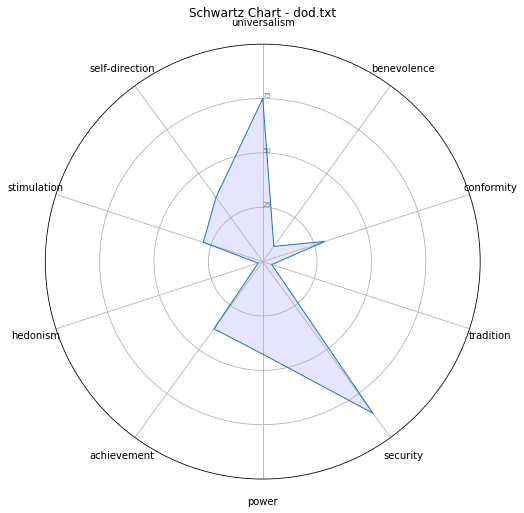

,universalism (0) - word,universalism (0) - score,universalism (1) - word,universalism (1) - score,universalism (2) - word,universalism (2) - score,benevolence (0) - word,benevolence (0) - score,benevolence (1) - word,benevolence (1) - score,...,stimulation (1) - word,stimulation (1) - score,stimulation (2) - word,stimulation (2) - score,self-direction (0) - word,self-direction (0) - score,self-direction (1) - word,self-direction (1) - score,self-direction (2) - word,self-direction (2) - score
0,% UNIVERSALISM (0),28.300,% UNIVERSALISM (1),74.980,% UNIVERSALISM (2),43.520,% BENEVOLENCE (0),0.0,% BENEVOLENCE (1),8.660,...,% STIMULATION (1),28.720,% STIMULATION (2),18.530,% SELF-DIRECTION (0),0.070,% SELF-DIRECTION (1),36.560,% SELF-DIRECTION (2),2.730
1,state,4.257,right,41.697,peace,7.112,one,0.0,one,3.822,...,million,21.623,also,7.436,new,0.018,new,17.107,state,0.878
2,woman,2.951,peace,27.170,think,6.465,people,0.0,individual,2.971,...,country,19.975,physical,5.312,also,0.016,state,17.093,individual,0.785
3,right,2.821,war,25.438,one,5.883,also,0.0,people,2.052,...,world,16.337,one,5.247,think,0.013,one,12.205,new,0.745
4,new,2.476,state,25.283,resource,5.704,individual,0.0,state,2.018,...,new,10.330,people,4.490,state,0.013,nation,11.592,also,0.653
5,country,2.119,world,18.324,world,5.641,right,0.0,also,1.937,...,one,9.327,new,4.202,people,0.012,also,10.916,one,0.599
6,world,1.908,one,17.963,also,4.921,state,0.0,right,1.769,...,people,9.289,time,3.853,one,0.011,people,9.838,lead,0.544
7,government,1.854,also,17.483,state,4.219,act,0.0,act,1.580,...,also,8.500,part,3.738,individual,0.011,information,7.283,think,0.457
8,also,1.710,people,16.815,security,3.126,would,0.0,need,1.308,...,state,7.574,world,3.269,need,0.008,need,7.144,would,0.425
9,people,1.660,resource,15.759,need,2.866,find,0.0,power,1.283,...,service,7.087,coast,2.960,different,0.008,time,7.091,people,0.407


In [14]:
test.report_interactive_result(test_context, test_doc_names, pretrained_doc_name, purity_score = False, word_count = n_of_words, only_doc_words=True)

In [15]:
test.report_test_excel(test_context, test_corpusPP, test_doc_names, output_file = "test_result.xlsx")

,name,universalism,benevolence,conformity,tradition,security,power,achievement,hedonism,stimulation,self-direction,Text
0,pope.txt,4.040715,63.909306,40.332618,22.782479,6.293177,8.727138,10.311021,34.270452,23.190005,4.368536,good even good morning sure time regardless ho...
1,dod.txt,74.979626,8.658796,30.110368,4.364227,86.232317,42.547565,38.193093,2.203972,28.723649,36.564244,behalf secretary defense deputy secretary defe...
2,https://www.nationalgeographic.com/science/spa...,83.351298,6.751900,0.029905,0.400209,44.193277,37.288825,7.295849,5.778209,61.335990,0.003121,earth home planet planet solar system know har...


In [16]:
test.report_test_csv(test_context, test_corpusPP, test_doc_names, output_file = "test_result.csv")

,name,universalism,benevolence,conformity,tradition,security,power,achievement,hedonism,stimulation,self-direction,Text
0,pope.txt,4.040715,63.909306,40.332618,22.782479,6.293177,8.727138,10.311021,34.270452,23.190005,4.368536,good even good morning sure time regardless ho...
1,dod.txt,74.979626,8.658796,30.110368,4.364227,86.232317,42.547565,38.193093,2.203972,28.723649,36.564244,behalf secretary defense deputy secretary defe...
2,https://www.nationalgeographic.com/science/spa...,83.351298,6.751900,0.029905,0.400209,44.193277,37.288825,7.295849,5.778209,61.335990,0.003121,earth home planet planet solar system know har...
